In [34]:
import matplotlib.pyplot as plt
words = open('names.txt', 'r').read().splitlines()

In [35]:
bigram_dict = {}
for word in words:
    chs = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        bigram_dict[bigram] = bigram_dict.get(bigram, 0) + 1

In [36]:
sorted(bigram_dict.items(), key = lambda kv: -kv[1])[:10]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

In [37]:
import torch

In [38]:
# Pre-process the data, creating a map of strings to ints to convert the input
# as well as an int to string mapping to convert the output

chars = sorted(list(set(''.join(words))))
stoi = { s: i+1 for i,s in enumerate(chars) }
stoi['.'] = 0
itos = { i: s for s,i in stoi.items() }

print(stoi)
print(itos)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [121]:
# Bigrams kinda suck
# Shall we use a neural network?
xs, ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        rowIdx = stoi[ch1]
        colIdx = stoi[ch2]
        print(ch1, ch2)
        xs.append(rowIdx)
        ys.append(colIdx)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [122]:
# Xs are the index of the first character in the bigram at each index
xs

tensor([ 0,  5, 13, 13,  1])

In [123]:
# Ys are the index of the second character in the bigram at each index
ys

tensor([ 5, 13, 13,  1,  0])

In [124]:
# To feed it into the NN, we need to encode it using one hot encoding as floats
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [125]:
yenc = F.one_hot(ys, num_classes=27).float()
yenc

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

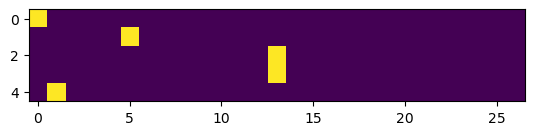

In [126]:
plt.imshow(xenc)

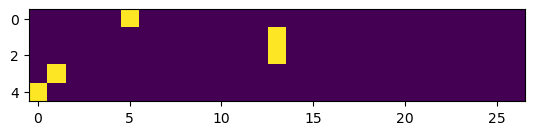

In [127]:
plt.imshow(yenc)

In [145]:
# As an example, create weights for one neuron:
# Define weights for first neuron 
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,1), generator=g) # 27 features / 1 neuron
W[:6]

tensor([[ 1.5674],
        [-0.2373],
        [-0.0274],
        [-1.1008],
        [ 0.2859],
        [-0.0296]])

In [146]:
# Define weights for first neuron
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g) # 27 features / 27 neurons
W[:3]

tensor([[ 1.5674, -0.2373, -0.0274, -1.1008,  0.2859, -0.0296, -1.5471,  0.6049,
          0.0791,  0.9046, -0.4713,  0.7868, -0.3284, -0.4330,  1.3729,  2.9334,
          1.5618, -1.6261,  0.6772, -0.8404,  0.9849, -0.1484, -1.4795,  0.4483,
         -0.0707,  2.4968,  2.4448],
        [-0.6701, -1.2199,  0.3031, -1.0725,  0.7276,  0.0511,  1.3095, -0.8022,
         -0.8504, -1.8068,  1.2523, -1.2256,  1.2165, -0.9648, -0.2321, -0.3476,
          0.3324, -1.3263,  1.1224,  0.5964,  0.4585,  0.0540, -1.7400,  0.1156,
          0.8032,  0.5411, -1.1646],
        [ 0.1476, -1.0006,  0.3801,  0.4733, -0.9103, -0.7830,  0.1351, -0.2116,
         -1.0406, -1.5367,  0.9374, -0.8830,  1.7457,  2.1346, -0.8561,  0.5408,
          0.6169,  1.5160, -1.0447, -0.6641, -0.7239,  1.7507,  0.1753,  0.9928,
         -0.6279,  0.0770, -1.1641]])

In [147]:
# Matrix multiply xenc by Weights
# (5<-, 27) @ (27, 27<-) = (5, 27)
# Dot product = multiply then add
xenc @ W

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9644e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2844e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4040e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0731e-02,
          2.4968e+00,  2.4448e+00],
        [ 4.7236e-01,  1.4830e+00,  3.1748e-01,  1.0588e+00,  2.3982e+00,
          4.6827e-01, -6.5650e-01,  6.1662e-01, -6.2198e-01,  5.1007e-01,
          1.3563e+00,  2.3445e-01, -4.5585e-01, -1.3132e-03, -5.1161e-01,
          5.5570e-01,  4.7458e-01, -1.3867e+00,  1.6229e+00,  1.7197e-01,
          9.8846e-01,  5.0657e-01,  1.0198e+00, -1.9062e+00, -4.2753e-01,
         -2.1259e+00,  9.6041e-01],
        [ 1.9359e-01,  1.0532e+00,  6.3393e-01,  2.5786e-01,  9.6408e-01,
         -2.4855e-01,  2.4756e-02, -3.0404e-02,  1.5622e+00, -4.4852e-01,
         -1.2345e+00,  1.1220e+00, -6.73

In [148]:
# In order to demonstrate the dot product
# we look at one input feature and its corresponding weights at each neuron:
print(xenc[3])
print(W[:, 10])

# Same as (xenc @ W)[3, 10]
dot_product = (xenc[3] * W[:, 10]).sum()
print(dot_product)
print((xenc @ W)[3, 10])

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([-0.4713,  1.2523,  0.9374,  0.1467,  0.9019,  1.3563,  0.9737, -0.4958,
        -1.2542, -0.3907, -0.0492, -1.5264, -1.3270, -1.2345, -0.7517, -2.1007,
         0.1124, -0.2929, -1.0672, -0.9939,  0.6408, -0.1471, -1.0143, -0.3921,
         1.4224, -0.5996, -0.6348])
tensor(-1.2345)
tensor(-1.2345)


In [149]:
# Neurons are giving us logits (log counts), which we have to exponentiate https://www.wolframalpha.com/input?i=exp%28x%29
# This normalizes the data into counts, like the bigram model, getting rid of the negative numbers
# 
logits = xenc @ W
counts = logits.exp() # equivalent to N in bigram model
counts

tensor([[ 4.7940,  0.7888,  0.9730,  0.3326,  1.3309,  0.9708,  0.2129,  1.8311,
          1.0824,  2.4710,  0.6242,  2.1964,  0.7200,  0.6486,  3.9469, 18.7908,
          4.7673,  0.1967,  1.9683,  0.4315,  2.6775,  0.8621,  0.2277,  1.5656,
          0.9317, 12.1434, 11.5281],
        [ 1.6038,  4.4060,  1.3737,  2.8830, 11.0032,  1.5972,  0.5187,  1.8527,
          0.5369,  1.6654,  3.8818,  1.2642,  0.6339,  0.9987,  0.5995,  1.7432,
          1.6073,  0.2499,  5.0680,  1.1876,  2.6871,  1.6596,  2.7728,  0.1486,
          0.6521,  0.1193,  2.6128],
        [ 1.2136,  2.8669,  1.8850,  1.2942,  2.6224,  0.7799,  1.0251,  0.9701,
          4.7691,  0.6386,  0.2910,  3.0710,  0.5098,  1.0386,  0.5719,  0.4373,
          2.2763,  0.4719,  2.5289,  0.2265,  0.8082,  0.3054,  0.5164,  0.7918,
          4.6866,  1.8232,  0.4921],
        [ 1.2136,  2.8669,  1.8850,  1.2942,  2.6224,  0.7799,  1.0251,  0.9701,
          4.7691,  0.6386,  0.2910,  3.0710,  0.5098,  1.0386,  0.5719,  0.4373

In [150]:
# Calculate the probability distribution by summing and dividing by number of weights:
# Also known as softmax
# NOTE: all of these computations are differentiable, i.e. we can back propagate through them.
# We interpret this as the probability of the next character given the input character
probs = counts / counts.sum(1, keepdims=True)
print(probs.shape)
probs

torch.Size([5, 27])


tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [154]:
negative_lls = torch.zeros(5)

for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    print('-' * 10)
    print(f'bigram example {i+1}')
    print(f'x (input): {itos[x]} | y (label): {itos[y]} (indexes {x},{y})')
    print('output probabilities from the neural net: ', probs[i])
    print('label (actual next character): ', y)
    prob = probs[i, y]
    print('probability assigned by the network to the correct character: ', prob.item())
    log_prob = torch.log(prob)
    print('log likelihood:', log_prob.item())
    negative_ll = -log_prob
    print('negative log likelihood:', negative_ll.item())
    negative_lls[i] = negative_ll
    print()
    
print('=' * 10)
print('average negative log likelihood, i.e. loss =', negative_lls.mean().item())

----------
bigram example 1
x (input): . | y (label): e (indexes 0,5)
output probabilities from the neural net:  tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character):  5
probability assigned by the network to the correct character:  0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465

----------
bigram example 2
x (input): e | y (label): m (indexes 5,13)
output probabilities from the neural net:  tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character):  13
probability assigned by the network to the correct charac